# Principal Component Analysis of spatial distribution of the recent Ridgecrest earthquakes

Source of data: https://earthquake.usgs.gov/earthquakes/map/#%7B%22autoUpdate%22%3A%5B%22autoUpdate%22%5D%2C%22basemap%22%3A%22grayscale%22%2C%22feed%22%3A%227day_m25%22%2C%22listFormat%22%3A%22default%22%2C%22mapposition%22%3A%5B%5B34.912962495216966%2C-119.16320800781249%5D%2C%5B36.91696023183306%2C-115.6475830078125%5D%5D%2C%22overlays%22%3A%5B%22plates%22%5D%2C%22restrictListToMap%22%3A%5B%22restrictListToMap%22%5D%2C%22search%22%3Anull%2C%22sort%22%3A%22newest%22%2C%22timezone%22%3A%22utc%22%2C%22viewModes%22%3A%5B%22list%22%2C%22map%22%2C%22settings%22%5D%2C%22event%22%3Anull%7D

PCA article: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Geo Pandas: https://www.datacamp.com/community/tutorials/geospatial-data-python

In [1]:
import pandas as pd
# hides Jupyter warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import geopandas
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


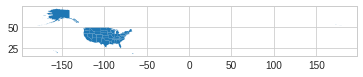

In [2]:
country.plot()

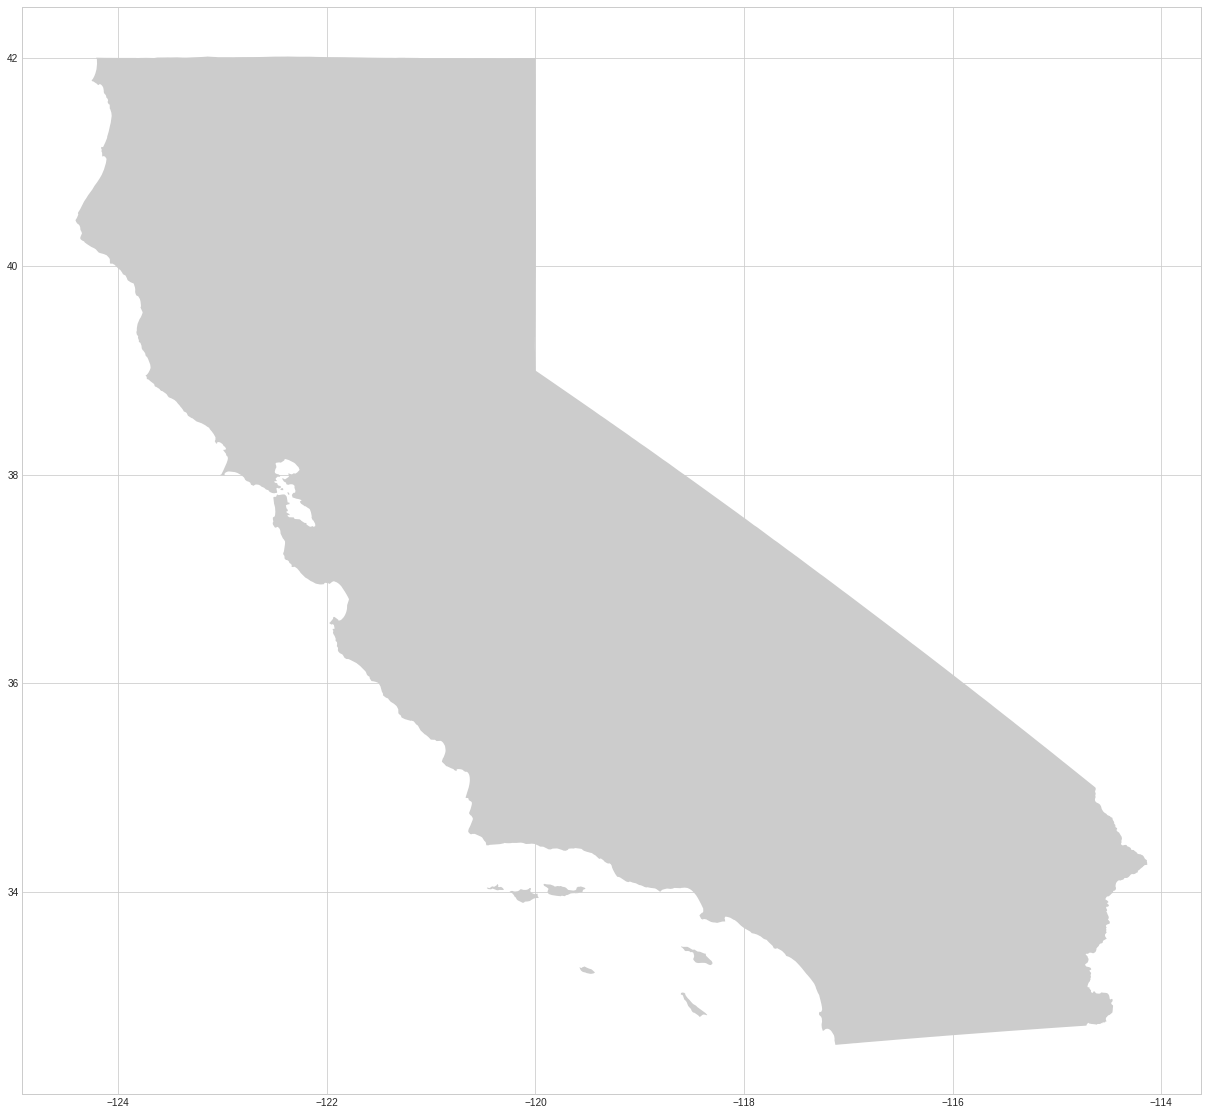

In [3]:
country[country['NAME'].isin(['California']) == True].plot(figsize=(30,20), color='#CCCCCC');

In [4]:
qk = geopandas.read_file("2.5_month.geojson")
qk.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,ci38600815,3.28,"14km NE of Coso Junction, CA",1563504733590,1563504868134,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",48.0,0.02262,0.18,51.0,ml,earthquake,"M 3.3 - 14km NE of Coso Junction, CA",POINT Z (-117.8280029 36.1238327 2.86)
1,ci38600727,2.58,"20km ESE of Little Lake, CA",1563503808010,1563504481630,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",33.0,0.08560,0.16,48.0,ml,earthquake,"M 2.6 - 20km ESE of Little Lake, CA",POINT Z (-117.697 35.8741667 7.5)
2,ci38600703,2.47,"20km W of Searles Valley, CA",1563503614080,1563503842559,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",26.0,0.02568,0.20,55.0,ml,earthquake,"M 2.5 - 20km W of Searles Valley, CA",POINT Z (-117.6225 35.8 7.25)
3,ci38600551,2.48,"18km NNE of Ridgecrest, CA",1563501912470,1563502558770,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",34.0,0.04062,0.16,60.0,ml,earthquake,"M 2.5 - 18km NNE of Ridgecrest, CA",POINT Z (-117.6221667 35.7803333 9.83)
4,pr2019200000,2.86,"98km NNW of Road Town, British Virgin Islands",1563500165820,1563502053040,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",pr,us,",",geoserve,origin,phase-data,",9.0,1.44260,0.35,339.0,md,earthquake,"M 2.9 - 98km NNW of Road Town, British Virgin ...",POINT Z (-64.92059999999999 19.2465 35)


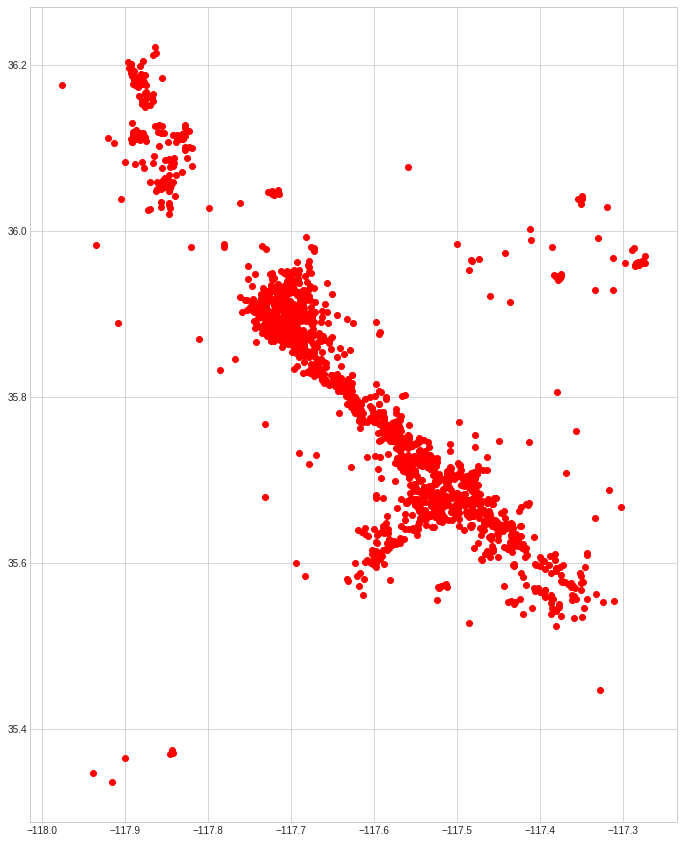

In [5]:
qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)].plot(figsize=(20,15), color='#FF0000');

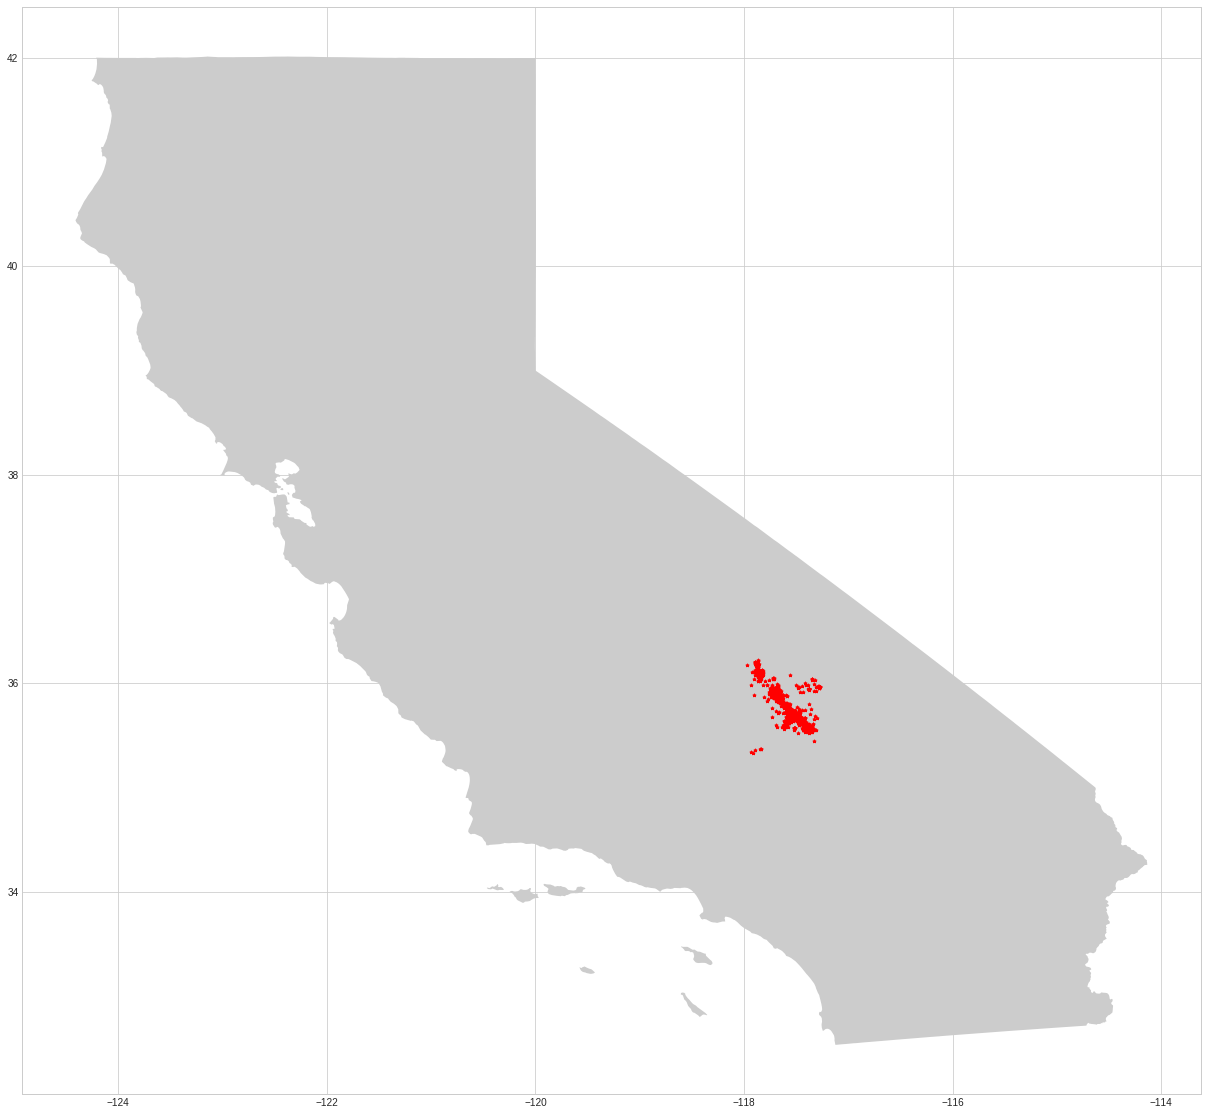

In [6]:
# Plotting California shape:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['California']) == True].plot(ax=ax, color='#CCCCCC')

# adding Ridge Crest quake positions on top with red color to stand out:
qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)].plot(ax=base, color='red', marker="*", markersize=10);

In [7]:
qk['lat'] = qk['geometry'].x
qk['lon'] = qk['geometry'].y

In [8]:
from sklearn.preprocessing import StandardScaler
features = ['lat', 'lon']
# Separating out the features
cali = qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)]
x = cali.loc[:, features].values
sc = StandardScaler()
x = sc.fit_transform(x)
x[:10]

array([[-1.55601705,  2.050333  ],
       [-0.6006456 ,  0.4428277 ],
       [-0.0573357 , -0.03470374],
       [-0.05490503, -0.16133021],
       [-0.38186309,  0.24323038],
       [ 1.30640059,  0.7003649 ],
       [ 1.07666582, -1.00156796],
       [-1.58273623,  1.96985408],
       [-0.06950293, -0.12484897],
       [-1.98262179,  1.9687814 ]])

In [9]:
print(sc.mean_, sc.scale_)

[-117.61463799   35.80538993] [0.13712248 0.15531271]


In [10]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.describe()

,pc1,pc2
count,1725.000000,1.725000e+03
mean,0.000000,8.238177e-18
std,1.336908,4.624261e-01
min,-3.114195,-2.538789e+00
25%,-1.047595,-1.013896e-01
50%,-0.194432,4.001153e-02
75%,0.942835,1.492870e-01
max,3.548389,3.756830e+00


In [13]:
print(pca.singular_values_, pca.components_)

[55.5098502  19.20043048] [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [11]:
print(sc.inverse_transform(pca.components_[0]))
print(sc.inverse_transform(pca.components_[1]))
print(sc.inverse_transform([0.0, 0.0]))

[-117.71159822   35.9152126 ]
[-117.71159822   35.69556726]
[-117.61463799   35.80538993]


In [12]:
# from shapely.geometry import LineString
# LineString([(0, 0), (0, 1)])

df = pd.DataFrame(
    {'Name': ['Center', 'Dir1', 'Dir2'],
     'Coordinates': ['POINT(-117.61463799 35.80538993)',
                     'POINT(-117.71159822 35.9152126)',
                     'POINT(-117.71159822 35.69556726)']})

from shapely import wkt

df['Coordinates'] = df['Coordinates'].apply(wkt.loads)
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

,Name,Coordinates
0,Center,POINT (-117.61463799 35.80538993)
1,Dir1,POINT (-117.71159822 35.9152126)
2,Dir2,POINT (-117.71159822 35.69556726)


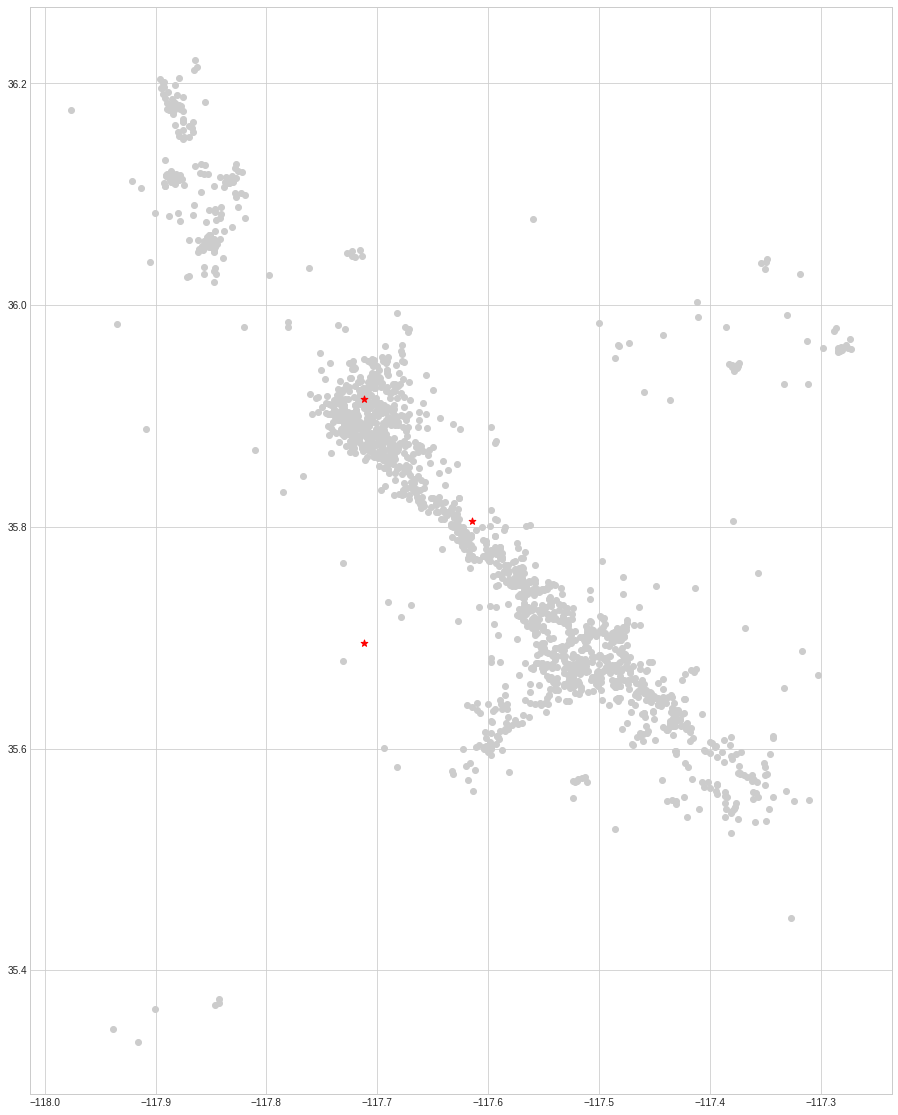

In [13]:
# Plotting Ridge Crest quake locations:
fig, ax = plt.subplots(1, figsize=(30, 20))
base = qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)].plot(ax=ax, color='#CCCCCC')

# adding Ridge Crest quake positions on top with red color to stand out:
gdf.plot(ax=base, color='red', marker="*", markersize=50);

In [14]:
print(sc.inverse_transform(pca.components_[0] * 3.0))
print(sc.inverse_transform(pca.components_[0] * -3.0))
print(sc.inverse_transform(pca.components_[1] * 3.0))
print(sc.inverse_transform(pca.components_[1] * -3.0))

[-117.90551869   36.13485794]
[-117.32375728   35.47592193]
[-117.90551869   35.47592193]
[-117.32375728   36.13485794]


In [15]:
dfa = pd.DataFrame(
    {'Name': ['Axis1', 'Axis2'],
     'Lines': ['LINESTRING(-117.90551869 36.13485794, -117.32375728 35.47592193)',
               'LINESTRING(-117.90551869 35.47592193, -117.32375728 36.13485794)'],
    })

from shapely import wkt

dfa['Lines'] = dfa['Lines'].apply(wkt.loads)
gdfa = geopandas.GeoDataFrame(dfa, geometry='Lines')
gdfa.head()

,Name,Lines
0,Axis1,"LINESTRING (-117.90551869 36.13485794, -117.32..."
1,Axis2,"LINESTRING (-117.90551869 35.47592193, -117.32..."


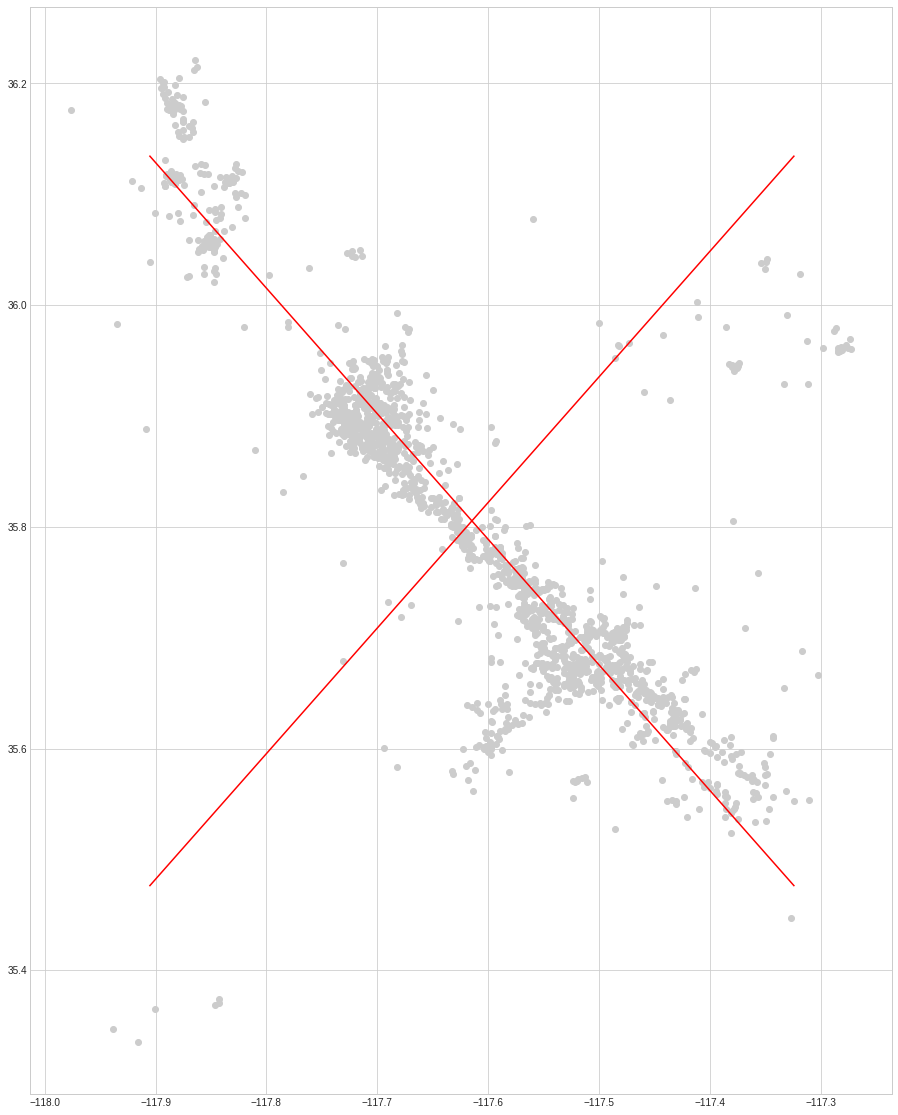

In [16]:
# Plotting Ridge Crest quake locations:
fig, ax = plt.subplots(1, figsize=(30, 20))
base = qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)].plot(ax=ax, color='#CCCCCC')

# adding Ridge Crest quake positions on top with red color to stand out:
gdfa.plot(ax=base, color='red', markersize=20);